In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib as plt
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns

In [173]:
label=pd.read_csv('../lite_data/train_label_lite.csv')
label.head()

,new_id,label
0,tr0,month
1,tr1,week
2,tr2,retained
3,tr3,week
4,tr4,retained


In [186]:
activity.columns

Index(['cnt_dt', 'play_time', 'npc_exp', 'npc_hongmun', 'quest_exp',
       'quest_hongmun', 'item_hongmun', 'game_combat_time', 'get_money',
       'duel_cnt', 'duel_win', 'partybattle_cnt', 'partybattle_win',
       'cnt_enter_inzone_solo', 'cnt_enter_inzone_light',
       'cnt_enter_inzone_skilled', 'cnt_enter_inzone_normal', 'cnt_enter_raid',
       'cnt_enter_raid_light', 'cnt_enter_bam', 'cnt_clear_inzone_solo',
       'cnt_clear_inzone_light', 'cnt_clear_inzone_skilled',
       'cnt_clear_inzone_normal', 'cnt_clear_raid', 'cnt_clear_raid_light',
       'cnt_clear_bam', 'normal_chat', 'whisper_chat', 'district_chat',
       'party_chat', 'guild_chat', 'faction_chat', 'cnt_use_buffitem',
       'gathering_cnt', 'making_cnt', 'payment_amount', 'wk', 'new_id',
       'play_time', 'npc_exp', 'npc_hongmun', 'quest_exp', 'quest_hongmun',
       'item_hongmun', 'game_combat_time', 'get_money', 'duel_cnt', 'duel_win',
       'partybattle_cnt', 'partybattle_win', 'cnt_enter_inzone_solo',


In [187]:
activity=pd.read_csv('../transformed/train_real_values.csv')

Index(['cnt_dt', 'play_time', 'npc_exp', 'npc_hongmun', 'quest_exp',
       'quest_hongmun', 'item_hongmun', 'game_combat_time', 'get_money',
       'duel_cnt', 'duel_win', 'partybattle_cnt', 'partybattle_win',
       'cnt_enter_inzone_solo', 'cnt_enter_inzone_light',
       'cnt_enter_inzone_skilled', 'cnt_enter_inzone_normal', 'cnt_enter_raid',
       'cnt_enter_raid_light', 'cnt_enter_bam', 'cnt_clear_inzone_solo',
       'cnt_clear_inzone_light', 'cnt_clear_inzone_skilled',
       'cnt_clear_inzone_normal', 'cnt_clear_raid', 'cnt_clear_raid_light',
       'cnt_clear_bam', 'normal_chat', 'whisper_chat', 'district_chat',
       'party_chat', 'guild_chat', 'faction_chat', 'cnt_use_buffitem',
       'gathering_cnt', 'making_cnt', 'payment_amount', 'wk', 'new_id'],
      dtype='object')

In [7]:
activity.isnull().sum() # 컬럼별 결측 개수 --(없음)

cnt_dt                      0
play_time                   0
npc_exp                     0
npc_hongmun                 0
quest_exp                   0
quest_hongmun               0
item_hongmun                0
game_combat_time            0
get_money                   0
duel_cnt                    0
duel_win                    0
partybattle_cnt             0
partybattle_win             0
cnt_enter_inzone_solo       0
cnt_enter_inzone_light      0
cnt_enter_inzone_skilled    0
cnt_enter_inzone_normal     0
cnt_enter_raid              0
cnt_enter_raid_light        0
cnt_enter_bam               0
cnt_clear_inzone_solo       0
cnt_clear_inzone_light      0
cnt_clear_inzone_skilled    0
cnt_clear_inzone_normal     0
cnt_clear_raid              0
cnt_clear_raid_light        0
cnt_clear_bam               0
normal_chat                 0
whisper_chat                0
district_chat               0
party_chat                  0
guild_chat                  0
faction_chat                0
cnt_use_bu

In [8]:
activity.dtypes # 일단 모든변수 표준화된 numeric type, (wk와 cnt_dt 제외)

cnt_dt                      float64
play_time                   float64
npc_exp                     float64
npc_hongmun                 float64
quest_exp                   float64
quest_hongmun               float64
item_hongmun                float64
game_combat_time            float64
get_money                   float64
duel_cnt                    float64
duel_win                    float64
partybattle_cnt             float64
partybattle_win             float64
cnt_enter_inzone_solo       float64
cnt_enter_inzone_light      float64
cnt_enter_inzone_skilled    float64
cnt_enter_inzone_normal     float64
cnt_enter_raid              float64
cnt_enter_raid_light        float64
cnt_enter_bam               float64
cnt_clear_inzone_solo       float64
cnt_clear_inzone_light      float64
cnt_clear_inzone_skilled    float64
cnt_clear_inzone_normal     float64
cnt_clear_raid              float64
cnt_clear_raid_light        float64
cnt_clear_bam               float64
normal_chat                 

In [9]:
activity.describe().T #activity feature기술통계량

,count,mean,std,min,25%,50%,75%,max
cnt_dt,440578.0,4.418800e+00,2.089511e+00,1.0,3.000000,5.000000,6.000000e+00,7.000000e+00
play_time,440578.0,6.629150e+04,1.006802e+05,0.0,651.000001,13385.000013,1.011850e+05,6.048000e+05
npc_exp,440578.0,7.494474e+03,3.258033e+04,0.0,0.000000,0.000000,0.000000e+00,1.080468e+06
npc_hongmun,440578.0,2.285214e+05,7.838097e+05,0.0,0.000000,6426.000039,2.261088e+05,1.077289e+08
quest_exp,440578.0,4.788189e+05,1.923254e+06,0.0,0.000000,0.000000,0.000000e+00,2.094970e+07
quest_hongmun,440578.0,2.283772e+06,4.706770e+06,0.0,0.000000,127340.001526,2.467004e+06,2.271778e+08
item_hongmun,440578.0,1.457400e+02,4.736572e+02,0.0,0.000000,0.000000,9.000000e+01,2.990600e+04
game_combat_time,440578.0,2.000379e+04,3.529047e+04,0.0,0.000000,3131.000000,2.358675e+04,4.048110e+05
get_money,440578.0,8.415263e+06,3.585087e+08,0.0,0.000000,3940.000107,9.045300e+04,7.575554e+10
duel_cnt,440578.0,1.777095e+00,5.397909e+01,0.0,0.000000,0.000000,0.000000e+00,9.578000e+03


In [10]:
activity.skew()

cnt_dt                       -0.234156
play_time                     1.940251
npc_exp                       6.052881
npc_hongmun                  42.052310
quest_exp                     5.480499
quest_hongmun                 4.075952
item_hongmun                 10.549192
game_combat_time              2.766797
get_money                   120.839945
duel_cnt                    122.622614
duel_win                    125.287342
partybattle_cnt              10.747045
partybattle_win              11.579359
cnt_enter_inzone_solo         4.344760
cnt_enter_inzone_light        4.780730
cnt_enter_inzone_skilled      9.359875
cnt_enter_inzone_normal       4.524439
cnt_enter_raid                3.654598
cnt_enter_raid_light          3.824486
cnt_enter_bam               132.032971
cnt_clear_inzone_solo         4.362338
cnt_clear_inzone_light        4.529307
cnt_clear_inzone_skilled      9.410960
cnt_clear_inzone_normal       4.322346
cnt_clear_raid                3.696727
cnt_clear_raid_light     

In [11]:
activity.kurt()

cnt_dt                         -1.292912
play_time                       3.743089
npc_exp                        46.781853
npc_hongmun                  3710.547101
quest_exp                      33.987003
quest_hongmun                  38.655025
item_hongmun                  228.492457
game_combat_time               10.111413
get_money                   19028.941723
duel_cnt                    17075.419304
duel_win                    18679.183199
partybattle_cnt               163.997089
partybattle_win               193.802174
cnt_enter_inzone_solo          20.813474
cnt_enter_inzone_light         34.091606
cnt_enter_inzone_skilled      129.703589
cnt_enter_inzone_normal        31.225126
cnt_enter_raid                 17.240224
cnt_enter_raid_light           27.341248
cnt_enter_bam               33620.392607
cnt_clear_inzone_solo          20.967936
cnt_clear_inzone_light         29.983061
cnt_clear_inzone_skilled      130.991493
cnt_clear_inzone_normal        27.986202
cnt_clear_raid  

# 1.변수별 분포, value_counts()

## 1.1. playtime

{'whiskers': [<matplotlib.lines.Line2D at 0x7f55c8647f28>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55c8651828>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55c8647dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f55c865c0b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f55c865c4e0>],
 'means': []}

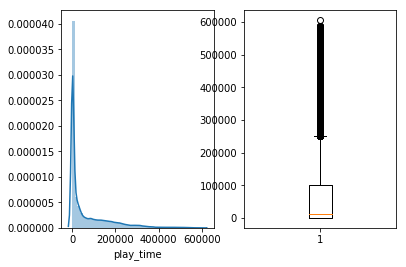

In [12]:
#전체 유저의 플레이타임 분포
plt.subplot(121)
sns.distplot(activity.play_time)
plt.subplot(122)
plt.boxplot(activity.play_time)

In [13]:
# 가장 작은값부터 확인
activity.play_time.value_counts().sort_index().head()

0.0    261
1.0     22
2.0      8
3.0      4
4.0      2
Name: play_time, dtype: int64

In [14]:
#빈도수가 높은 값 확인
activity.play_time.value_counts().sort_values(ascending=False).head()

19.0     1269
121.0     733
365.0     683
364.0     625
126.0     569
Name: play_time, dtype: int64

In [15]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['play_time'].sum().value_counts().sort_index().head()

1.0    1
2.0    1
4.0    1
6.0    1
7.0    3
Name: play_time, dtype: int64

In [16]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['play_time'].sum().value_counts().sort_values(ascending=False).head()

19.0     917
20.0     192
355.0    139
354.0    137
356.0    136
Name: play_time, dtype: int64

In [17]:
# 이상치?

In [18]:
pd.merge(activity[activity.play_time.astype(int)==19],label,on='new_id').describe().T

,count,mean,std,min,25%,50%,75%,max
cnt_dt,1269.0,1.002364,0.048583,1.0,1.0,1.0,1.0,2.0
play_time,1269.0,19.000000,0.000000,19.0,19.0,19.0,19.0,19.0
npc_exp,1269.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
npc_hongmun,1269.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
quest_exp,1269.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
quest_hongmun,1269.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
item_hongmun,1269.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
game_combat_time,1269.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
get_money,1269.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
duel_cnt,1269.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [19]:
pd.merge(activity[activity.play_time.astype(int)==19],label,on='new_id').label.value_counts()

2month      531
month       485
retained    135
week        118
Name: label, dtype: int64

In [20]:
pd.merge(activity[activity.play_time.astype(int)==19],label,on='new_id').y_pred.value_counts()

month     1010
2month     246
week        13
Name: y_pred, dtype: int64

In [21]:
sum(pd.merge(activity[activity.play_time.astype(int)==19],label,on='new_id').y_pred!=pd.merge(activity[activity.play_time.astype(int)==19],label,on='new_id').label)

686

# 1.2. npc_exp

{'whiskers': [<matplotlib.lines.Line2D at 0x7f55b300f048>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55b300f908>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55b3003eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f55b3017198>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f55b30175c0>],
 'means': []}

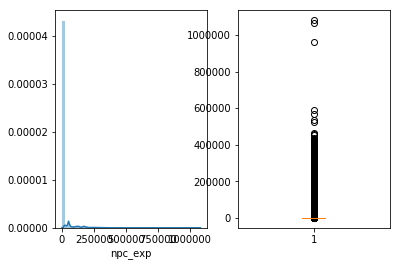

In [22]:
plt.subplot(121)
sns.distplot(activity.npc_exp)
plt.subplot(122)
plt.boxplot(activity.npc_exp)#npc 사냥 경험치

In [23]:
# 가장 작은값부터 확인
activity.npc_exp.value_counts().sort_index().head()

0.0    365353
1.0         1
2.0         4
3.0         2
4.0         3
Name: npc_exp, dtype: int64

In [24]:
#빈도수가 높은 값 확인
activity.npc_exp.value_counts().sort_values(ascending=False).head()

0.0      365353
28.0      17140
56.0        437
41.0        114
103.0        93
Name: npc_exp, dtype: int64

In [25]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['npc_exp'].sum().value_counts().sort_index().head()

0.0    47405
1.0        1
3.0        1
5.0        1
7.0        2
Name: npc_exp, dtype: int64

In [26]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['npc_exp'].sum().value_counts().sort_values(ascending=False).head()

0.0     47405
28.0    16625
56.0      394
56.0       79
41.0       53
Name: npc_exp, dtype: int64

In [27]:
# 28에 대한 탐구가 필요함

In [28]:
# 1.3 game_combat_time

{'whiskers': [<matplotlib.lines.Line2D at 0x7f55b2f2b5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55b2f2be80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55b2f2b470>],
 'medians': [<matplotlib.lines.Line2D at 0x7f55b2eb4710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f55b2eb4b38>],
 'means': []}

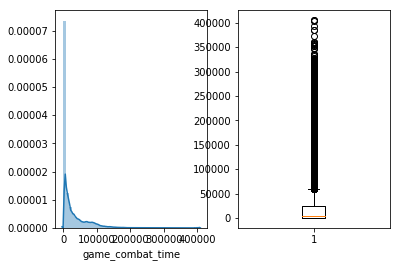

In [29]:
plt.subplot(121)
sns.distplot(activity.game_combat_time)
plt.subplot(122)
plt.boxplot(activity.game_combat_time)
#전체 전투 게임시간 

In [30]:
# 가장 작은값부터 확인
activity.game_combat_time.value_counts().sort_index().head()

0.0    150280
1.0         5
2.0         8
3.0         9
4.0       927
Name: game_combat_time, dtype: int64

In [31]:
#빈도수가 높은 값 확인
activity.game_combat_time.value_counts().sort_values(ascending=False).head()

0.0      150280
5.0        1085
4.0         927
116.0       566
117.0       564
Name: game_combat_time, dtype: int64

In [32]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['game_combat_time'].sum().value_counts().sort_index().head(10)

0.0    24199
2.0        3
4.0      169
5.0      203
6.0       28
7.0       19
8.0       26
8.0        8
9.0       40
9.0       17
Name: game_combat_time, dtype: int64

In [33]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['game_combat_time'].sum().value_counts().sort_values(ascending=False).head(10)

0.0      24199
116.0      542
117.0      534
118.0      514
115.0      499
119.0      498
122.0      492
121.0      482
120.0      479
123.0      459
Name: game_combat_time, dtype: int64

In [34]:
# combat time이 0인 값들을 해석
#game_combat_time이 0인 player들
combat_0=activity.groupby('new_id',as_index=False)['game_combat_time'].sum()[activity.groupby('new_id',as_index=False).sum()['game_combat_time'].astype(int)==0]

In [35]:
pd.merge(combat_0,label,on='new_id',how='left').head()

,new_id,game_combat_time,label,y_pred
0,tr0,0.0,month,2month
1,tr10013,0.0,month,week
2,tr10016,0.0,2month,2month
3,tr10017,0.0,2month,month
4,tr10019,0.0,retained,retained


In [36]:
sum(pd.merge(combat_0,label,on='new_id',how='left').label!=pd.merge(combat_0,label,on='new_id',how='left').y_pred)

8152

# 1.3 npc_hongmun(일정 고렙 이후 몬스터를 잡아서 얻은 경험치)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f55b2ddd9e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55b2dc12e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55b2ddd898>],
 'medians': [<matplotlib.lines.Line2D at 0x7f55b2dc1b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f55b2dc1f60>],
 'means': []}

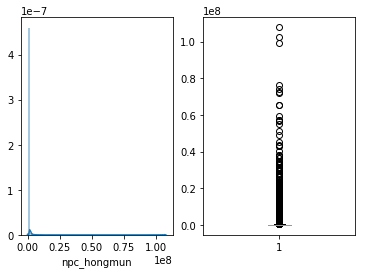

In [37]:
plt.subplot(121)
sns.distplot(activity.npc_hongmun)
plt.subplot(122)
plt.boxplot(activity.npc_hongmun)

#몬스터 사냥 홍문 경험치

In [38]:
# 가장 작은값부터 확인
activity.npc_hongmun.value_counts().sort_index().head()

0.0     208412
6.0          1
9.0          1
15.0         2
18.0         8
Name: npc_hongmun, dtype: int64

In [39]:
#빈도수가 높은 값 확인
activity.npc_hongmun.value_counts().sort_values(ascending=False).head()

0.000000       208412
285.000002       1242
1305.000008      1156
2610.000016       618
636.000004        399
Name: npc_hongmun, dtype: int64

In [40]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['npc_hongmun'].sum().value_counts().sort_index().head(10)

0.0     48196
15.0        1
18.0        5
25.0        1
36.0        3
40.0        2
48.0        1
51.0        1
54.0        4
55.0        1
Name: npc_hongmun, dtype: int64

In [41]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['npc_hongmun'].sum().value_counts().sort_values(ascending=False).head(10)

0.000000       48196
285.000002       323
671.000004       120
270.000002        48
478.000003        36
656.000004        29
6096.000037       16
3048.000019       15
255.000002        14
1524.000009       14
Name: npc_hongmun, dtype: int64

# 1.4 npc_hongmun(일정 고렙 찍은 이후 퀘스트를 깨서 얻은 경험치)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f55b2c7e6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55b2c7ef60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55b2c7e550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f55b2c887f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f55b2c88c18>],
 'means': []}

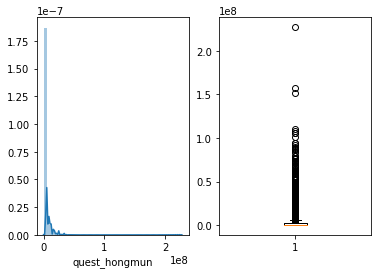

In [42]:
plt.subplot(121)
sns.distplot(activity.quest_hongmun)
plt.subplot(122)
plt.boxplot(activity.quest_hongmun)

#홍문 퀘스트 경험치 분포

In [43]:
# 가장 작은값부터 확인
activity.quest_hongmun.value_counts().sort_index().head()

0.000000      177436
70.000001          1
130.000002         3
200.000002         4
300.000004         3
Name: quest_hongmun, dtype: int64

In [44]:
#빈도수가 높은 값 확인
activity.quest_hongmun.value_counts().sort_values(ascending=False).head()

0.000000e+00    177436
4.500000e+06     11838
1.620000e+05      2474
1.655600e+07      1884
1.350000e+05      1644
Name: quest_hongmun, dtype: int64

In [45]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['quest_hongmun'].sum().value_counts().sort_index().head(10)

0.000000      39227
130.000002        2
200.000002        3
300.000004        2
340.000004        1
360.000004        4
430.000005        1
500.000006        4
570.000007        1
600.000007        1
Name: quest_hongmun, dtype: int64

In [46]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['quest_hongmun'].sum().value_counts().sort_values(ascending=False).head(10)

0.000000e+00    39227
4.500000e+06     7744
4.139000e+07      850
4.139000e+07      732
1.095443e+07      510
1.655600e+07      439
8.278000e+06      324
4.966800e+07      299
4.268400e+06      199
4.159630e+06      189
Name: quest_hongmun, dtype: int64

# 1.5 item_hongmun

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5512a58710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5512a58fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5512a585c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5512a64860>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5512a64c88>],
 'means': []}

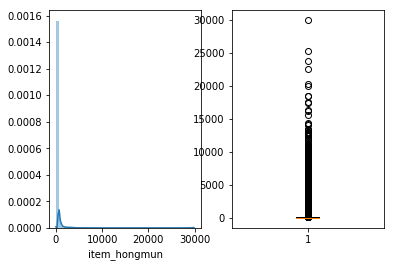

In [47]:
plt.subplot(121)
sns.distplot(activity.item_hongmun)
plt.subplot(122)
plt.boxplot(activity.item_hongmun)
# 아이템 홍문 경험치 분포

In [48]:
# 가장 작은값부터 확인
activity.item_hongmun.value_counts().sort_index().head()

0.0    246570
1.0      1125
2.0       479
3.0      2123
4.0      1902
Name: item_hongmun, dtype: int64

In [49]:
#빈도수가 높은 값 확인
activity.item_hongmun.value_counts().sort_values(ascending=False).head()

0.0     246570
12.0      5739
21.0      3061
10.0      3043
15.0      2564
Name: item_hongmun, dtype: int64

In [50]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['item_hongmun'].sum().value_counts().sort_index().head(10)

0.0    57608
1.0      116
2.0        7
2.0       31
3.0        1
3.0        3
3.0       54
4.0        4
4.0       79
4.0        1
Name: item_hongmun, dtype: int64

In [51]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['item_hongmun'].sum().value_counts().sort_values(ascending=False).head(10)

0.0     57608
12.0     1153
24.0      442
81.0      359
78.0      320
75.0      272
72.0      251
84.0      244
82.0      238
87.0      224
Name: item_hongmun, dtype: int64

In [52]:
# item  homgmun이 12인 유저들

In [53]:
item_12=activity.groupby('new_id',as_index=False)['item_hongmun'].sum()[activity.groupby('new_id',as_index=False)['item_hongmun'].sum()['item_hongmun'].astype(int)==12]

In [54]:
pd.merge(item_12,label).label.value_counts()

month       767
2month      184
week        174
retained     50
Name: label, dtype: int64

In [55]:
pd.merge(item_12,label).head()

,new_id,item_hongmun,label,y_pred
0,tr10097,12.0,month,2month
1,tr10168,12.0,month,month
2,tr10292,12.0,month,month
3,tr10357,12.0,month,month
4,tr10384,12.0,2month,2month


In [56]:
# 적중률이 높음
sum(pd.merge(item_12,label).label==pd.merge(item_12,label).y_pred)/pd.merge(item_12,label).label.count()

0.945531914893617

# 1.6 duel_win

{'whiskers': [<matplotlib.lines.Line2D at 0x7f55128f85c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55128f8e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55128f8470>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5512900710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5512900b38>],
 'means': []}

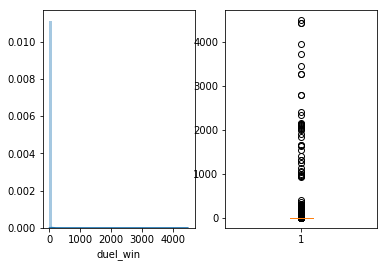

In [57]:
plt.subplot(121)
sns.distplot(activity.duel_win)
plt.subplot(122)
plt.boxplot(activity.duel_win)

#듀얼 승리횟수 분포

In [58]:
# 가장 작은값부터 확인
activity.duel_win.value_counts().sort_index().head()

0.0    413997
1.0      5489
2.0      3570
3.0      2597
4.0      1804
Name: duel_win, dtype: int64

In [59]:
#빈도수가 높은 값 확인
activity.duel_win.value_counts().sort_values(ascending=False).head()

0.0    413997
1.0      5489
2.0      3570
3.0      2597
4.0      1804
Name: duel_win, dtype: int64

In [60]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['duel_win'].sum().value_counts().sort_index().head(10)

0.0    92397
1.0     1054
2.0      479
2.0      230
3.0      291
3.0      192
3.0       58
4.0       93
4.0       54
4.0       91
Name: duel_win, dtype: int64

In [61]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['duel_win'].sum().value_counts().sort_values(ascending=False).head(10)

0.0    92397
1.0     1054
2.0      479
3.0      291
2.0      230
3.0      192
4.0      189
5.0      175
4.0       93
4.0       91
Name: duel_win, dtype: int64

# 1.8 partybattle_count(전장 참여 횟수)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f551280fda0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f551281a6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f551280fc50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f551281aef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5512823358>],
 'means': []}

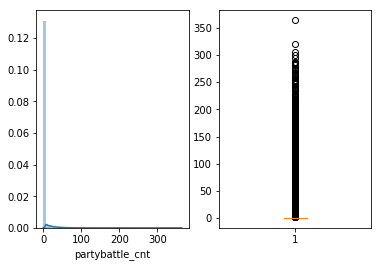

In [62]:
plt.subplot(121)
sns.distplot(activity.partybattle_cnt)
plt.subplot(122)
plt.boxplot(activity.partybattle_cnt)

#전장 횟수 분포(파티 듀얼)

In [63]:
# 가장 작은값부터 확인
activity.partybattle_cnt.value_counts().sort_index().head()

0.0    407864
1.0      2776
2.0      1979
3.0      1982
4.0      1690
Name: partybattle_cnt, dtype: int64

In [64]:
#빈도수가 높은 값 확인
activity.partybattle_cnt.value_counts().sort_values(ascending=False).head()

0.0    407864
1.0      2776
3.0      1982
2.0      1979
4.0      1690
Name: partybattle_cnt, dtype: int64

In [65]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['partybattle_cnt'].sum().value_counts().sort_index().head(10)

0.0    91357
1.0      574
2.0       82
2.0      262
3.0       17
3.0       63
3.0      260
4.0        9
4.0       24
4.0       21
Name: partybattle_cnt, dtype: int64

In [66]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['partybattle_cnt'].sum().value_counts().sort_values(ascending=False).head(10)

0.0    91357
1.0      574
2.0      262
3.0      260
4.0      150
5.0      107
6.0       90
7.0       83
2.0       82
3.0       63
Name: partybattle_cnt, dtype: int64

# 1.9 partybattle_win(전장 승리 횟수)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f55126c15f8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55126c1eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55126c14a8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f55126cc748>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f55126ccb70>],
 'means': []}

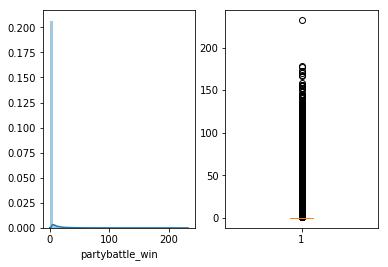

In [67]:
plt.subplot(121)
sns.distplot(activity.partybattle_win)
plt.subplot(122)
plt.boxplot(activity.partybattle_win)

#전장 승리 횟수 분포

In [68]:
# 가장 작은값부터 확인
activity.partybattle_win.value_counts().sort_index().head()

0.0    411117
1.0      3893
2.0      2926
3.0      2373
4.0      1834
Name: partybattle_win, dtype: int64

In [69]:
#빈도수가 높은 값 확인
activity.partybattle_win.value_counts().sort_values(ascending=False).head()

0.0    411117
1.0      3893
2.0      2926
3.0      2373
4.0      1834
Name: partybattle_win, dtype: int64

In [70]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['partybattle_win'].sum().value_counts().sort_index().head(10)

0.0    92078
1.0      740
2.0      137
2.0      338
3.0       33
3.0      188
3.0      142
4.0      135
4.0       76
4.0       23
Name: partybattle_win, dtype: int64

In [71]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['partybattle_win'].sum().value_counts().sort_values(ascending=False).head(10)

0.0     92078
1.0       740
2.0       338
3.0       188
3.0       142
2.0       137
4.0       135
15.0      130
17.0      128
5.0       128
Name: partybattle_win, dtype: int64

# 1.10솔로 인던 횟수

{'whiskers': [<matplotlib.lines.Line2D at 0x7f55125e6320>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55125e6be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55125e61d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f551256f470>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f551256f898>],
 'means': []}

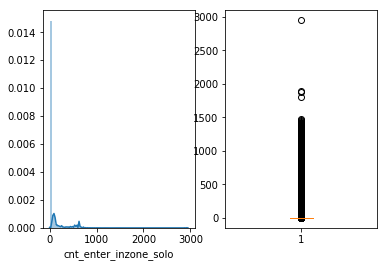

In [72]:
plt.subplot(121)
sns.distplot(activity.cnt_enter_inzone_solo)
plt.subplot(122)
plt.boxplot(activity.cnt_enter_inzone_solo)

# 솔로 인던 횟수분포

In [73]:
# 가장 작은값부터 확인
activity.cnt_enter_inzone_solo.value_counts().sort_index().head()

0.0    329635
1.0      3398
2.0      1345
3.0      4025
4.0      2840
Name: cnt_enter_inzone_solo, dtype: int64

In [74]:
#빈도수가 높은 값 확인
activity.cnt_enter_inzone_solo.value_counts().sort_values(ascending=False).head()

0.0      329635
18.0       4486
108.0      4151
3.0        4025
90.0       3763
Name: cnt_enter_inzone_solo, dtype: int64

In [75]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['cnt_enter_inzone_solo'].sum().value_counts().sort_index().head(10)

0.0    65377
1.0      516
2.0       69
2.0      114
3.0        9
3.0       50
3.0     2253
4.0        5
4.0        9
4.0       11
Name: cnt_enter_inzone_solo, dtype: int64

In [76]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['cnt_enter_inzone_solo'].sum().value_counts().sort_values(ascending=False).head(30)

0.0      65377
3.0       2253
21.0      1163
24.0       850
27.0       561
1.0        516
54.0       431
36.0       408
108.0      403
30.0       378
105.0      359
102.0      357
90.0       346
99.0       342
93.0       310
18.0       307
96.0       302
33.0       274
87.0       254
111.0      249
11.0       242
6.0        241
84.0       235
114.0      223
81.0       209
72.0       206
39.0       195
78.0       192
75.0       175
4.0        168
Name: cnt_enter_inzone_solo, dtype: int64

In [77]:
# 전부 3의 배수인 이유?

# 1.11인던 입장 회수(난이도 쉬움)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5512487be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55124924e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5512487a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5512492d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f551249d198>],
 'means': []}

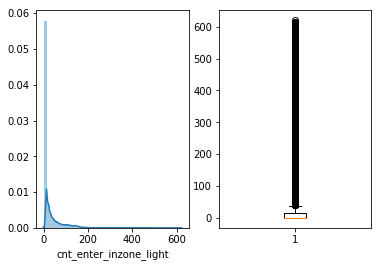

In [78]:
plt.subplot(121)
sns.distplot(activity.cnt_enter_inzone_light)
plt.subplot(122)
plt.boxplot(activity.cnt_enter_inzone_light)

#인던 라이트 입장 횟수 분포

In [79]:
# 가장 작은값부터 확인
activity.cnt_enter_inzone_light.value_counts().sort_index().head()

0.0    241129
1.0      6453
2.0      7077
3.0      7923
4.0      8302
Name: cnt_enter_inzone_light, dtype: int64

In [80]:
#빈도수가 높은 값 확인
activity.cnt_enter_inzone_light.value_counts().sort_values(ascending=False).head()

0.0    241129
4.0      8302
3.0      7923
6.0      7515
2.0      7077
Name: cnt_enter_inzone_light, dtype: int64

In [81]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['cnt_enter_inzone_light'].sum().value_counts().sort_index().head(10)

0.0    57213
1.0      728
2.0       75
2.0      448
3.0       31
3.0      699
3.0       80
4.0        9
4.0       83
4.0       35
Name: cnt_enter_inzone_light, dtype: int64

In [82]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['cnt_enter_inzone_light'].sum().value_counts().sort_values(ascending=False).head(10)

0.0    57213
1.0      728
3.0      699
4.0      622
2.0      448
5.0      353
6.0      322
9.0      201
7.0      166
8.0      153
Name: cnt_enter_inzone_light, dtype: int64

# 1.12 인던 숙련 입장 횟수

{'whiskers': [<matplotlib.lines.Line2D at 0x7f551232eeb8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55123377b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f551232ed68>],
 'medians': [<matplotlib.lines.Line2D at 0x7f551233f048>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f551233f470>],
 'means': []}

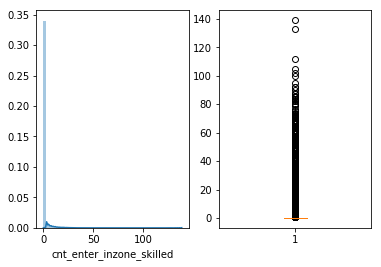

In [83]:
plt.subplot(121)
sns.distplot(activity.cnt_enter_inzone_skilled)
plt.subplot(122)
plt.boxplot(activity.cnt_enter_inzone_skilled)

#숙련 인던 횟수 분포

In [84]:
# 가장 작은값부터 확인
activity.cnt_enter_inzone_skilled.value_counts().sort_index().head()

0.0    400874
1.0      9677
2.0      5673
3.0      3849
4.0      2915
Name: cnt_enter_inzone_skilled, dtype: int64

In [85]:
#빈도수가 높은 값 확인
activity.cnt_enter_inzone_skilled.value_counts().sort_values(ascending=False).head()

0.0    400874
1.0      9677
2.0      5673
3.0      3849
4.0      2915
Name: cnt_enter_inzone_skilled, dtype: int64

In [86]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['cnt_enter_inzone_skilled'].sum().value_counts().sort_index().head(10)

0.0    90485
1.0     1257
2.0      389
2.0      348
3.0      135
3.0      272
3.0      156
4.0       31
4.0      145
4.0      173
Name: cnt_enter_inzone_skilled, dtype: int64

In [87]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['cnt_enter_inzone_skilled'].sum().value_counts().sort_values(ascending=False).head(10)

0.0    90485
1.0     1257
2.0      389
2.0      348
3.0      272
4.0      173
3.0      156
4.0      145
3.0      135
5.0      105
Name: cnt_enter_inzone_skilled, dtype: int64

# 1.13  인던 입장회수 합

{'whiskers': [<matplotlib.lines.Line2D at 0x7f551225f0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f551225f9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5512255f60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5512266240>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5512266668>],
 'means': []}

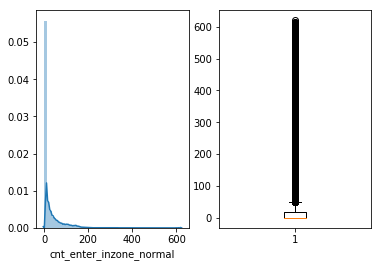

In [88]:
plt.subplot(121)
sns.distplot(activity.cnt_enter_inzone_normal)
plt.subplot(122)
plt.boxplot(activity.cnt_enter_inzone_normal)

#일반 던전 횟수분포

In [89]:
# 가장 작은값부터 확인
activity.cnt_enter_inzone_normal.value_counts().sort_index().head()

0.0    219020
1.0      6181
2.0      7333
3.0     11406
4.0      8101
Name: cnt_enter_inzone_normal, dtype: int64

In [90]:
#빈도수가 높은 값 확인
activity.cnt_enter_inzone_normal.value_counts().sort_values(ascending=False).head()

0.0    219020
3.0     11406
6.0     11389
4.0      8101
2.0      7333
Name: cnt_enter_inzone_normal, dtype: int64

In [91]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['cnt_enter_inzone_normal'].sum().value_counts().sort_index().head(10)

0.0    48658
1.0      824
2.0      840
2.0      110
3.0     2233
3.0      210
3.0       23
4.0      731
4.0       99
4.0       63
Name: cnt_enter_inzone_normal, dtype: int64

In [92]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['cnt_enter_inzone_normal'].sum().value_counts().sort_values(ascending=False).head(10)

0.0     48658
3.0      2233
6.0      1605
15.0     1182
2.0       840
1.0       824
4.0       731
5.0       518
9.0       375
18.0      317
Name: cnt_enter_inzone_normal, dtype: int64

# 1.14 레이드 참여 횟수

{'whiskers': [<matplotlib.lines.Line2D at 0x7f55120fadd8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55121036d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55120fac88>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5512103f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f551210a390>],
 'means': []}

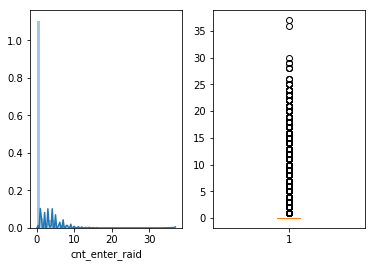

In [93]:
plt.subplot(121)
sns.distplot(activity.cnt_enter_raid)
plt.subplot(122)
plt.boxplot(activity.cnt_enter_raid)

#레이드 횟수분포

In [94]:
# 가장 작은값부터 확인
activity.cnt_enter_raid.value_counts().sort_index().head()

0.0    360230
1.0     17928
2.0      8833
3.0     13894
4.0     13085
Name: cnt_enter_raid, dtype: int64

In [95]:
#빈도수가 높은 값 확인
activity.cnt_enter_raid.value_counts().sort_values(ascending=False).head()

0.0    360230
1.0     17928
3.0     13894
4.0     13085
2.0      8833
Name: cnt_enter_raid, dtype: int64

In [96]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['cnt_enter_raid'].sum().value_counts().sort_index().head(10)

0.0    86343
1.0      948
2.0      242
2.0      409
3.0      119
3.0      160
3.0      272
4.0       34
4.0       74
4.0      110
Name: cnt_enter_raid, dtype: int64

In [97]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['cnt_enter_raid'].sum().value_counts().sort_values(ascending=False).head(10)

0.0    86343
1.0      948
2.0      409
3.0      272
4.0      251
2.0      242
5.0      192
3.0      160
8.0      146
5.0      134
Name: cnt_enter_raid, dtype: int64

# 1.15 레이드 참여 횟수(난이도 쉬움)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f551201cf28>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5512026828>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f551201cdd8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5511fae0b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5511fae4e0>],
 'means': []}

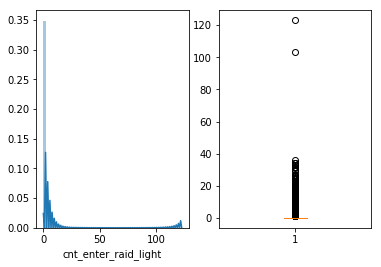

In [98]:
plt.subplot(121)
sns.distplot(activity.cnt_enter_raid_light)
plt.subplot(122)
plt.boxplot(activity.cnt_enter_raid_light)

#라이트 레이드 횟수분포

In [99]:
# 가장 작은값부터 확인
activity.cnt_enter_raid_light.value_counts().sort_index().head()

0.0    342228
1.0       965
2.0     34397
3.0      7355
4.0     18911
Name: cnt_enter_raid_light, dtype: int64

In [100]:
#빈도수가 높은 값 확인
activity.cnt_enter_raid_light.value_counts().sort_values(ascending=False).head()

0.0    342228
2.0     34397
4.0     18911
6.0     10825
3.0      7355
Name: cnt_enter_raid_light, dtype: int64

In [101]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['cnt_enter_raid_light'].sum().value_counts().sort_index().head(10)

0.0    83297
1.0      348
2.0      627
2.0       26
3.0       64
3.0      597
3.0        4
4.0      297
4.0       26
4.0        2
Name: cnt_enter_raid_light, dtype: int64

In [102]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['cnt_enter_raid_light'].sum().value_counts().sort_values(ascending=False).head(10)

0.0     83297
16.0     1025
2.0       627
3.0       597
17.0      405
1.0       348
32.0      339
4.0       297
14.0      290
7.0       239
Name: cnt_enter_raid_light, dtype: int64

# 1.16 밤의 바람평야 enter

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5511ecb198>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5511ecba58>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5511ecb048>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5511ed32e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5511ed3710>],
 'means': []}

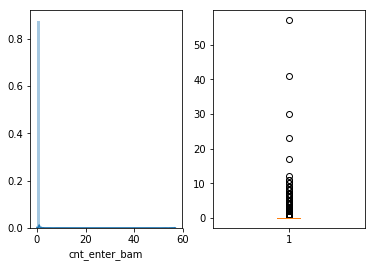

In [103]:
plt.subplot(121)
sns.distplot(activity.cnt_enter_bam)
plt.subplot(122)
plt.boxplot(activity.cnt_enter_bam)

#밤의 평원 횟수분포

In [104]:
# 가장 작은값부터 확인
activity.cnt_enter_bam.value_counts().sort_index().head()

0.0    437939
1.0      2071
2.0       378
3.0       108
4.0        41
Name: cnt_enter_bam, dtype: int64

In [105]:
#빈도수가 높은 값 확인
activity.cnt_enter_bam.value_counts().sort_values(ascending=False).head()

0.0    437939
1.0      2071
2.0       378
3.0       108
4.0        41
Name: cnt_enter_bam, dtype: int64

In [106]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['cnt_enter_bam'].sum().value_counts().sort_index().head(10)

0.0    97935
1.0     1390
2.0      166
2.0      211
3.0       53
3.0       26
3.0       66
4.0       19
4.0        3
4.0       26
Name: cnt_enter_bam, dtype: int64

In [107]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['cnt_enter_bam'].sum().value_counts().sort_values(ascending=False).head(10)

0.0    97935
1.0     1390
2.0      211
2.0      166
3.0       66
3.0       53
4.0       26
3.0       26
4.0       19
4.0       12
Name: cnt_enter_bam, dtype: int64

In [108]:
# 1.17 버프아이템 사용 횟수

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5511d6c358>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5511d6cc18>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5511d6c208>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5511d744a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5511d748d0>],
 'means': []}

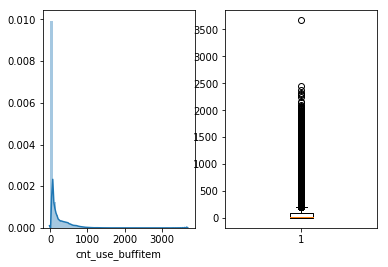

In [109]:
plt.subplot(121)
sns.distplot(activity.cnt_use_buffitem)
plt.subplot(122)
plt.boxplot(activity.cnt_use_buffitem)

#버프아이템 사용 횟수 분포

In [110]:
# 가장 작은값부터 확인
activity.cnt_use_buffitem.value_counts().sort_index().head()

0.0    166794
1.0     23732
2.0      5178
3.0      3967
4.0      3500
Name: cnt_use_buffitem, dtype: int64

In [111]:
#빈도수가 높은 값 확인
activity.cnt_use_buffitem.value_counts().sort_values(ascending=False).head()

0.0    166794
1.0     23732
2.0      5178
3.0      3967
4.0      3500
Name: cnt_use_buffitem, dtype: int64

In [112]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['cnt_use_buffitem'].sum().value_counts().sort_index().head(10)

0.0    26706
1.0    17766
2.0      800
2.0      193
3.0      270
3.0      118
3.0       26
4.0       21
4.0       67
4.0      174
Name: cnt_use_buffitem, dtype: int64

In [113]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['cnt_use_buffitem'].sum().value_counts().sort_values(ascending=False).head(10)

0.0    26706
1.0    17766
2.0      800
3.0      270
2.0      193
4.0      174
5.0      164
6.0      154
7.0      151
8.0      135
Name: cnt_use_buffitem, dtype: int64

In [114]:
# 1은 튜토리얼만 한 사람들

# 1.18 get_money(재화 획득량)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5511c8f748>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5511c99048>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5511c8f5f8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5511c99898>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5511c99cc0>],
 'means': []}

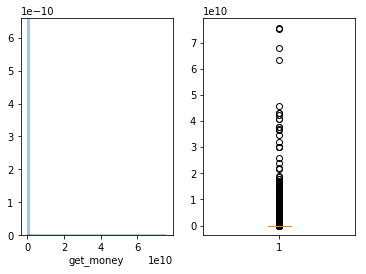

In [115]:
plt.subplot(121)
sns.distplot(activity.get_money)
plt.subplot(122)
plt.boxplot(activity.get_money)

#금액 횟수 분포 --> trade데이터와 연관지어 보니 거래 내역도 이 데이터에 포함되어 잇음

In [116]:
# 가장 작은값부터 확인
activity.get_money.value_counts().sort_index().head()

0.0    180154
1.0        53
2.0        31
3.0        27
4.0        22
Name: get_money, dtype: int64

In [117]:
#빈도수가 높은 값 확인
activity.get_money.value_counts().sort_values(ascending=False).head()

0.000000     180154
5.000000        121
1.000000         53
6.000000         52
97.000003        49
Name: get_money, dtype: int64

In [118]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['get_money'].sum().value_counts().sort_index().head(10)

0.0    43568
1.0       15
2.0        8
3.0        1
3.0        7
4.0        5
5.0        1
5.0       51
6.0       15
7.0       16
Name: get_money, dtype: int64

In [119]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['get_money'].sum().value_counts().sort_values(ascending=False).head(10)

0.000000     43568
5.000000        51
7.000000        16
6.000000        15
1.000000        15
51.000001       14
8.000000        14
10.000000       14
9.000000        12
31.000001       12
Name: get_money, dtype: int64

# 1.20 수집 횟수

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5511b3a048>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5511b3a908>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5511b32eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5511b42198>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5511b425c0>],
 'means': []}

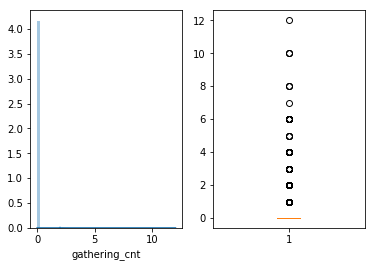

In [120]:
plt.subplot(121)
sns.distplot(activity.gathering_cnt)
plt.subplot(122)
plt.boxplot(activity.gathering_cnt)
#채집 횟수 분포

In [121]:
# 가장 작은값부터 확인
activity.duel_win.value_counts().sort_index().head()

0.0    413997
1.0      5489
2.0      3570
3.0      2597
4.0      1804
Name: duel_win, dtype: int64

In [122]:
#빈도수가 높은 값 확인
activity.duel_win.value_counts().sort_values(ascending=False).head()

0.0    413997
1.0      5489
2.0      3570
3.0      2597
4.0      1804
Name: duel_win, dtype: int64

In [123]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['duel_win'].sum().value_counts().sort_index().head(10)

0.0    92397
1.0     1054
2.0      479
2.0      230
3.0      291
3.0      192
3.0       58
4.0       93
4.0       54
4.0       91
Name: duel_win, dtype: int64

In [124]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['duel_win'].sum().value_counts().sort_values(ascending=False).head(10)

0.0    92397
1.0     1054
2.0      479
3.0      291
2.0      230
3.0      192
4.0      189
5.0      175
4.0       93
4.0       91
Name: duel_win, dtype: int64

# 1.22 제작 횟수

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5511a5e470>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5511a5ed30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5511a5e320>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5511a685c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5511a689e8>],
 'means': []}

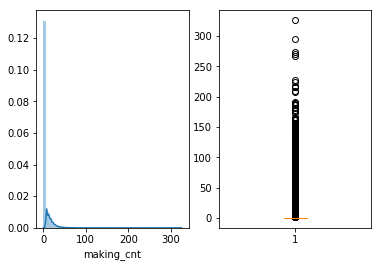

In [125]:
plt.subplot(121)
sns.distplot(activity.making_cnt)
plt.subplot(122)
plt.boxplot(activity.making_cnt)

#제작 횟수 분포

In [126]:
# 가장 작은값부터 확인
activity.duel_win.value_counts().sort_index().head()

0.0    413997
1.0      5489
2.0      3570
3.0      2597
4.0      1804
Name: duel_win, dtype: int64

In [127]:
#빈도수가 높은 값 확인
activity.duel_win.value_counts().sort_values(ascending=False).head()

0.0    413997
1.0      5489
2.0      3570
3.0      2597
4.0      1804
Name: duel_win, dtype: int64

In [128]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['duel_win'].sum().value_counts().sort_index().head(10)

0.0    92397
1.0     1054
2.0      479
2.0      230
3.0      291
3.0      192
3.0       58
4.0       93
4.0       54
4.0       91
Name: duel_win, dtype: int64

In [129]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['duel_win'].sum().value_counts().sort_values(ascending=False).head(10)

0.0    92397
1.0     1054
2.0      479
3.0      291
2.0      230
3.0      192
4.0      189
5.0      175
4.0       93
4.0       91
Name: duel_win, dtype: int64

# 1.23 quest로 얻은 경험치(고렙 이전 혹은 중간에)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5511903908>,
 'caps': [<matplotlib.lines.Line2D at 0x7f551190a208>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55119037b8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f551190aa58>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f551190ae80>],
 'means': []}

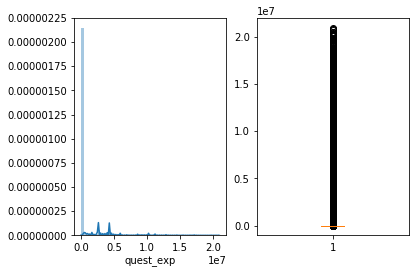

In [130]:
plt.subplot(121)
sns.distplot(activity.quest_exp)
plt.subplot(122)
plt.boxplot(activity.quest_exp)

#일반 퀘스트 경험치 분포

In [131]:
# 가장 작은값부터 확인
activity.quest_exp.value_counts().sort_index().head()

0.0      361739
70.0          5
80.0          1
91.0          1
104.0         1
Name: quest_exp, dtype: int64

In [132]:
#빈도수가 높은 값 확인
activity.quest_exp.value_counts().sort_values(ascending=False).head()

0.000000e+00    361739
8.610000e+03     17259
2.588780e+06      6555
4.298120e+06      4520
8.715000e+04      1032
Name: quest_exp, dtype: int64

In [133]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['quest_exp'].sum().value_counts().sort_index().head(10)

0.0      46630
70.0         2
130.0        1
200.0        3
300.0        8
340.0        1
360.0       14
370.0        1
430.0        1
440.0        2
Name: quest_exp, dtype: int64

In [134]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['quest_exp'].sum().value_counts().sort_values(ascending=False).head(10)

0.000000e+00    46630
8.610000e+03    16706
2.588780e+06     5145
4.298120e+06     4458
2.142800e+07      650
5.982420e+06      593
4.298120e+06      566
1.709340e+06      515
1.722000e+04      449
2.588780e+06      427
Name: quest_exp, dtype: int64

# 1.24 듀얼 승리 횟수

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5511828e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55117b0710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5511828cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f55117b0f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f55117ba3c8>],
 'means': []}

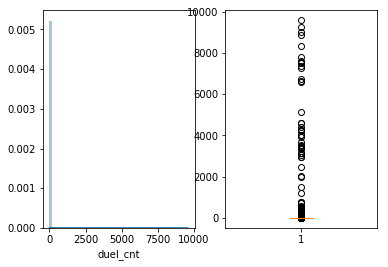

In [135]:
plt.subplot(121)
sns.distplot(activity.duel_cnt)
plt.subplot(122)
plt.boxplot(activity.duel_cnt)

In [136]:
# 가장 작은값부터 확인
activity.duel_cnt.value_counts().sort_index().head()

0.0    412594
1.0      3072
2.0      2235
3.0      2524
4.0      1606
Name: duel_cnt, dtype: int64

In [137]:
#빈도수가 높은 값 확인
activity.duel_cnt.value_counts().sort_values(ascending=False).head()

0.0    412594
1.0      3072
3.0      2524
2.0      2235
4.0      1606
Name: duel_cnt, dtype: int64

In [138]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['duel_cnt'].sum().value_counts().sort_index().head(10)

0.0    91891
1.0      642
2.0      443
3.0      526
4.0      297
5.0       63
5.0      265
6.0        9
6.0      337
7.0        2
Name: duel_cnt, dtype: int64

In [139]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['duel_cnt'].sum().value_counts().sort_values(ascending=False).head(10)

0.0    91891
1.0      642
3.0      526
2.0      443
6.0      337
4.0      297
5.0      265
7.0      136
7.0      125
9.0      101
Name: duel_cnt, dtype: int64

# 1.25 payment amount

{'whiskers': [<matplotlib.lines.Line2D at 0x7f55116c9da0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55116d46a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55116c9c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f55116d4ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f55116dc358>],
 'means': []}

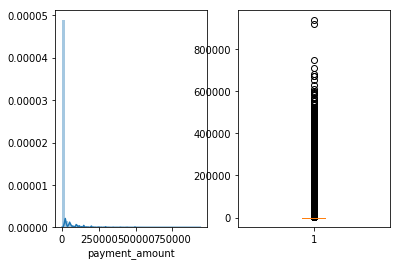

In [140]:
plt.subplot(121)
sns.distplot(activity.payment_amount)
plt.subplot(122)
plt.boxplot(activity.payment_amount)

In [141]:
# 가장 작은값부터 확인
activity.payment_amount.value_counts().sort_index().head()

0.0       399872
990.0        454
1980.0       206
2970.0       133
3960.0        95
Name: payment_amount, dtype: int64

In [142]:
#빈도수가 높은 값 확인
activity.payment_amount.value_counts().sort_values(ascending=False).head()

0.0        399872
19800.0      8013
49500.0      4527
29700.0      2681
99000.0      2576
Name: payment_amount, dtype: int64

In [143]:
#uesr 별로 sum해서 정렬
activity.groupby('new_id')['payment_amount'].sum().value_counts().sort_index().head(10)

0.0       87698
990.0        37
1980.0       23
2970.0       16
3960.0       11
4950.0       80
5940.0        7
6930.0        3
7920.0        2
8910.0        6
Name: payment_amount, dtype: int64

In [144]:
#user 별로 sum 후 빈도수가 높은 순
activity.groupby('new_id')['payment_amount'].sum().value_counts().sort_values(ascending=False).head(10)

0.0        87698
19800.0      885
39600.0      670
49500.0      411
29700.0      393
79200.0      332
69300.0      275
99000.0      232
9900.0       225
59400.0      223
Name: payment_amount, dtype: int64

In [145]:
# 2. correlation

In [146]:
activity.corr()

,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,get_money,duel_cnt,...,whisper_chat,district_chat,party_chat,guild_chat,faction_chat,cnt_use_buffitem,gathering_cnt,making_cnt,payment_amount,wk
cnt_dt,1.000000,0.503093,0.055674,0.275617,0.052663,0.234542,0.285566,0.441366,0.020376,0.031429,...,0.221652,0.017555,0.260586,0.336615,0.026752,0.351331,-0.000843,0.323787,0.162459,-0.089242
play_time,0.503093,1.000000,0.484238,0.390053,0.504083,0.636162,0.294591,0.868121,0.035538,0.059664,...,0.245715,0.037933,0.305745,0.353246,0.040965,0.798488,0.007786,0.392068,0.165829,0.007762
npc_exp,0.055674,0.484238,1.000000,-0.030635,0.934045,0.705907,-0.051463,0.346864,-0.004872,-0.006158,...,-0.036850,-0.003317,-0.020984,-0.051393,-0.003695,0.506400,0.008064,-0.030502,-0.032547,0.088979
npc_hongmun,0.275617,0.390053,-0.030635,1.000000,-0.023395,0.199864,0.433221,0.417222,0.008494,0.011252,...,0.258491,0.003934,0.312434,0.408988,0.034453,0.258588,0.005007,0.351676,0.182601,-0.043899
quest_exp,0.052663,0.504083,0.934045,-0.023395,1.000000,0.792436,-0.047428,0.366774,-0.004949,-0.006343,...,-0.037699,-0.003433,-0.018732,-0.050676,-0.004601,0.540636,0.004931,-0.014972,-0.031053,0.090747
quest_hongmun,0.234542,0.636162,0.705907,0.199864,0.792436,1.000000,0.219047,0.457989,0.002279,0.011513,...,0.151656,0.000820,0.228791,0.299999,0.013800,0.516368,0.015592,0.308948,0.132448,-0.028221
item_hongmun,0.285566,0.294591,-0.051463,0.433221,-0.047428,0.219047,1.000000,0.197588,0.021401,0.019292,...,0.286682,0.010296,0.361030,0.476434,0.041454,0.114843,0.005299,0.362834,0.362167,-0.034569
game_combat_time,0.441366,0.868121,0.346864,0.417222,0.366774,0.457989,0.197588,1.000000,0.000624,0.025137,...,0.186722,-0.002073,0.222515,0.225339,0.024149,0.872967,0.000192,0.284283,0.080096,0.033998
get_money,0.020376,0.035538,-0.004872,0.008494,-0.004949,0.002279,0.021401,0.000624,1.000000,0.000635,...,0.040100,0.038434,0.022758,0.024091,0.001050,-0.002193,-0.000288,0.011417,0.017520,-0.006347
duel_cnt,0.031429,0.059664,-0.006158,0.011252,-0.006343,0.011513,0.019292,0.025137,0.000635,1.000000,...,0.015966,0.000428,0.039293,0.103528,0.006068,-0.001604,0.000497,0.028432,0.010880,-0.014518


In [148]:
import seaborn as sns

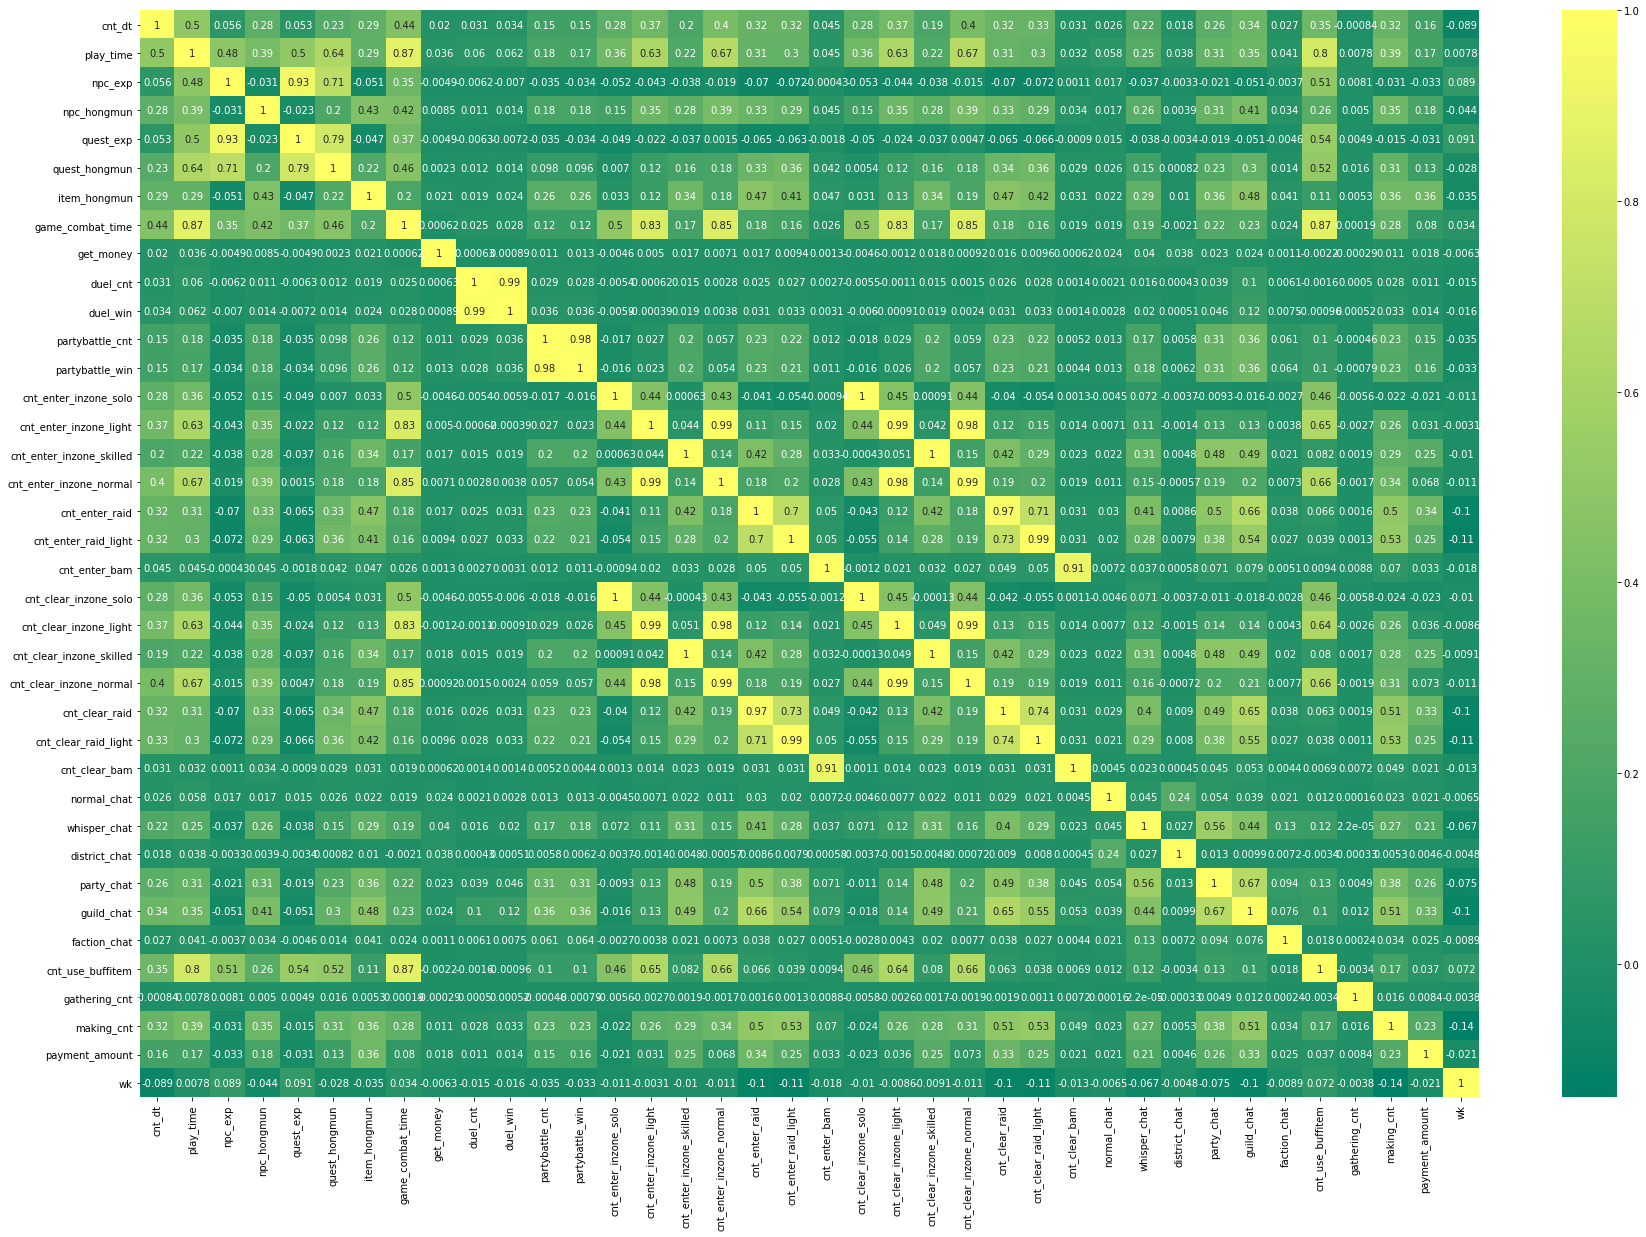

In [157]:
plt.figure(figsize=(30,20))
sns.heatmap(activity.corr(),annot=True,cmap='summer')

In [188]:
df_ml=pd.merge(activity,label,on='new_id')

# 라벨별 유저의 플레이 패턴 시각화

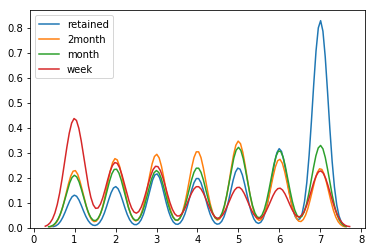

In [189]:
sns.kdeplot(df_ml.loc[df_ml.label=='retained','cnt_dt'],label='retained')
sns.kdeplot(df_ml.loc[df_ml.label=='2month','cnt_dt'],label='2month')
sns.kdeplot(df_ml.loc[df_ml.label=='month','cnt_dt'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','cnt_dt'],label='week')

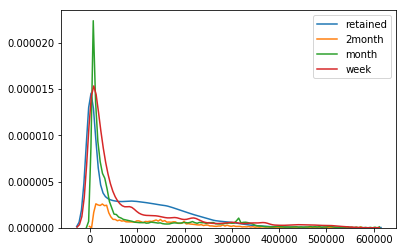

In [190]:
# 접속시간

sns.kdeplot(df_ml.loc[df_ml.label=='retained','play_time'],label='retained')
sns.kdeplot(df_ml.loc[df_ml.label=='2month','play_time'],label='2month')
sns.kdeplot(df_ml.loc[df_ml.label=='month','play_time'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','play_time'],label='week')

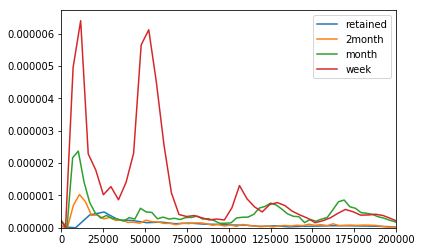

In [192]:
# 일반 경험치

sns.kdeplot(df_ml.loc[df_ml.label=='retained','npc_exp'],label='retained').set_xlim(0,200000)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','npc_exp'],label='2month')
sns.kdeplot(df_ml.loc[df_ml.label=='month','npc_exp'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','npc_exp'],label='week')

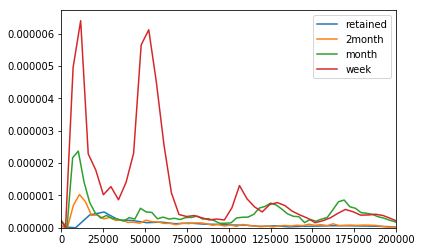

In [196]:
# npc 경험치

sns.kdeplot(df_ml.loc[df_ml.label=='retained','npc_exp'],label='retained').set_xlim(0,200000)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','npc_exp'],label='2month')
sns.kdeplot(df_ml.loc[df_ml.label=='month','npc_exp'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','npc_exp'],label='week')

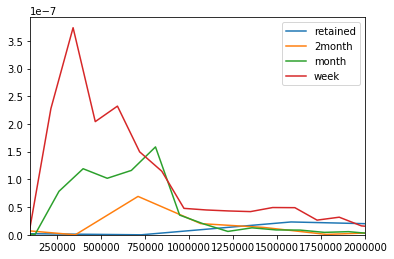

In [206]:
#npc 홍문 경험치

sns.kdeplot(df_ml.loc[df_ml.label=='retained','npc_hongmun'],label='retained').set_xlim(100000,2000000)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','npc_hongmun'],label='2month')
sns.kdeplot(df_ml.loc[df_ml.label=='month','npc_hongmun'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','npc_hongmun'],label='week')

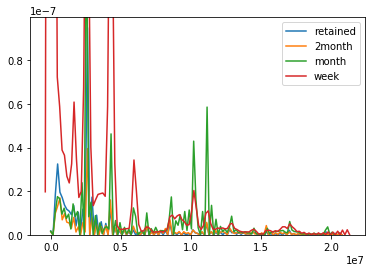

In [231]:
# 일반 퀘스트 경험치

sns.kdeplot(df_ml.loc[df_ml.label=='retained','quest_exp'],label='retained').set_ylim(0.000025)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','quest_exp'],label='2month')
sns.kdeplot(df_ml.loc[df_ml.label=='month','quest_exp'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','quest_exp'],label='week')

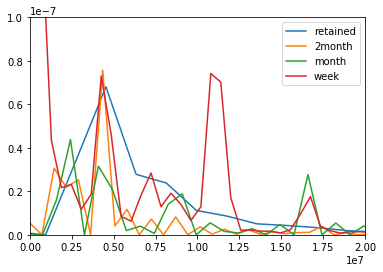

In [246]:
# 홍문 퀘스트 경험치

sns.kdeplot(df_ml.loc[df_ml.label=='retained','quest_hongmun'],label='retained').set_xlim(0,20000000)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','quest_hongmun'],label='2month').set_ylim(0,0.0000001)
sns.kdeplot(df_ml.loc[df_ml.label=='month','quest_hongmun'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','quest_hongmun'],label='week')

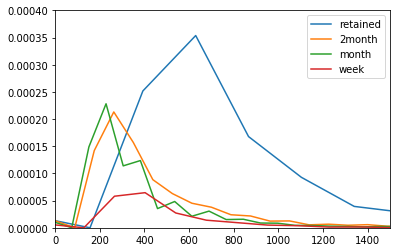

In [260]:
# 아이템 홍문 경험치

sns.kdeplot(df_ml.loc[df_ml.label=='retained','item_hongmun'],label='retained').set_xlim(0,1500)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','item_hongmun'],label='2month').set_ylim(0,0.0004)
sns.kdeplot(df_ml.loc[df_ml.label=='month','item_hongmun'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','item_hongmun'],label='week')

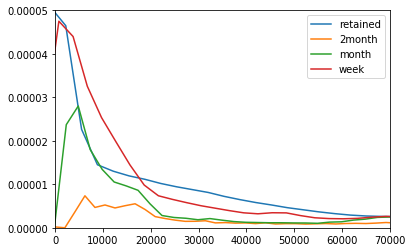

In [271]:
# 전투시간

sns.kdeplot(df_ml.loc[df_ml.label=='retained','game_combat_time'],label='retained').set_xlim(0,70000)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','game_combat_time'],label='2month').set_ylim(0,0.00005)
sns.kdeplot(df_ml.loc[df_ml.label=='month','game_combat_time'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','game_combat_time'],label='week')

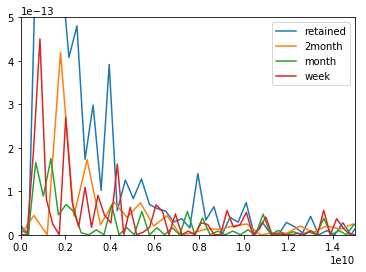

In [284]:
#재화 획득량

sns.kdeplot(df_ml.loc[df_ml.label=='retained','get_money'],label='retained').set_xlim(0,15000000000)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','get_money'],label='2month').set_ylim(0,0.0000000000005)
sns.kdeplot(df_ml.loc[df_ml.label=='month','get_money'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','get_money'],label='week')

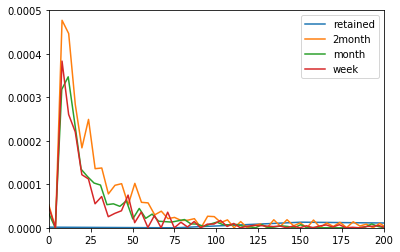

In [388]:
#듀얼 횟수

sns.kdeplot(df_ml.loc[df_ml.label=='retained','duel_cnt'],label='retained').set_xlim(0,200)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','duel_cnt'],label='2month').set_ylim(0,0.0005)
sns.kdeplot(df_ml.loc[df_ml.label=='month','duel_cnt'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','duel_cnt'],label='week')

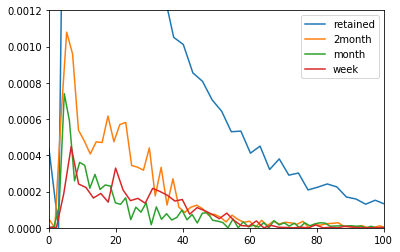

In [303]:
# 전장 참여 횟수

sns.kdeplot(df_ml.loc[df_ml.label=='retained','partybattle_cnt'],label='retained').set_xlim(0,100)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','partybattle_cnt'],label='2month').set_ylim(0,0.0012)
sns.kdeplot(df_ml.loc[df_ml.label=='month','partybattle_cnt'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','partybattle_cnt'],label='week')

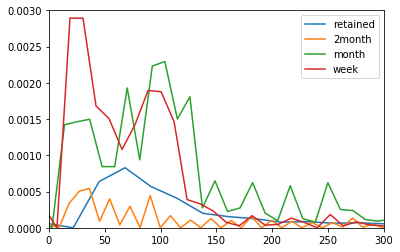

In [308]:
# 인던 솔로 참여 횟수

sns.kdeplot(df_ml.loc[df_ml.label=='retained','cnt_enter_inzone_solo'],label='retained').set_xlim(0,300)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','cnt_enter_inzone_solo'],label='2month').set_ylim(0,0.003)
sns.kdeplot(df_ml.loc[df_ml.label=='month','cnt_enter_inzone_solo'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','cnt_enter_inzone_solo'],label='week')

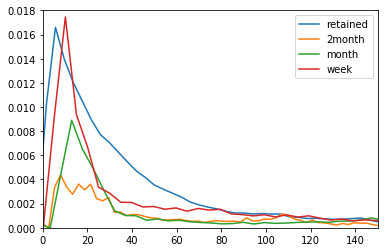

In [315]:
# 인던 라이트 참여 횟수

sns.kdeplot(df_ml.loc[df_ml.label=='retained','cnt_enter_inzone_light'],label='retained').set_xlim(0,150)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','cnt_enter_inzone_light'],label='2month').set_ylim(0,0.018)
sns.kdeplot(df_ml.loc[df_ml.label=='month','cnt_enter_inzone_light'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','cnt_enter_inzone_light'],label='week')

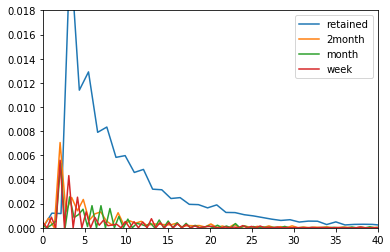

In [317]:
# 숙련 인던 참여 횟수

sns.kdeplot(df_ml.loc[df_ml.label=='retained','cnt_enter_inzone_skilled'],label='retained').set_xlim(0,40)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','cnt_enter_inzone_skilled'],label='2month').set_ylim(0,0.018)
sns.kdeplot(df_ml.loc[df_ml.label=='month','cnt_enter_inzone_skilled'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','cnt_enter_inzone_skilled'],label='week')

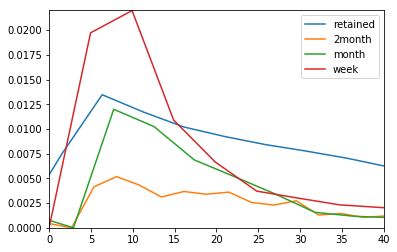

In [321]:
# 일반 인던 참여 횟수

sns.kdeplot(df_ml.loc[df_ml.label=='retained','cnt_enter_inzone_normal'],label='retained').set_xlim(0,40)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','cnt_enter_inzone_normal'],label='2month').set_ylim(0,0.022)
sns.kdeplot(df_ml.loc[df_ml.label=='month','cnt_enter_inzone_normal'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','cnt_enter_inzone_normal'],label='week')

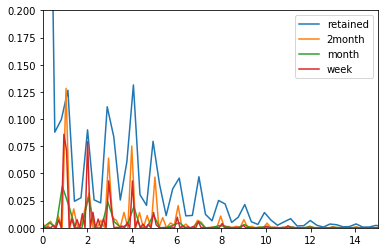

In [329]:
# 레이드 참여 횟수

sns.kdeplot(df_ml.loc[df_ml.label=='retained','cnt_enter_raid'],label='retained').set_xlim(0,15)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','cnt_enter_raid'],label='2month').set_ylim(0,0.2)
sns.kdeplot(df_ml.loc[df_ml.label=='month','cnt_enter_raid'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','cnt_enter_raid'],label='week')

In [185]:
activity.columns

Index(['cnt_dt', 'play_time', 'npc_exp', 'npc_hongmun', 'quest_exp',
       'quest_hongmun', 'item_hongmun', 'game_combat_time', 'get_money',
       'duel_cnt', 'duel_win', 'partybattle_cnt', 'partybattle_win',
       'cnt_enter_inzone_solo', 'cnt_enter_inzone_light',
       'cnt_enter_inzone_skilled', 'cnt_enter_inzone_normal', 'cnt_enter_raid',
       'cnt_enter_raid_light', 'cnt_enter_bam', 'cnt_clear_inzone_solo',
       'cnt_clear_inzone_light', 'cnt_clear_inzone_skilled',
       'cnt_clear_inzone_normal', 'cnt_clear_raid', 'cnt_clear_raid_light',
       'cnt_clear_bam', 'normal_chat', 'whisper_chat', 'district_chat',
       'party_chat', 'guild_chat', 'faction_chat', 'cnt_use_buffitem',
       'gathering_cnt', 'making_cnt', 'payment_amount', 'wk', 'new_id',
       'play_time', 'npc_exp', 'npc_hongmun', 'quest_exp', 'quest_hongmun',
       'item_hongmun', 'game_combat_time', 'get_money', 'duel_cnt', 'duel_win',
       'partybattle_cnt', 'partybattle_win', 'cnt_enter_inzone_solo',


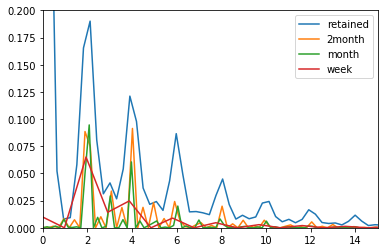

In [330]:
# 라이트 레이드 참여 횟수

sns.kdeplot(df_ml.loc[df_ml.label=='retained','cnt_enter_raid_light'],label='retained').set_xlim(0,15)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','cnt_enter_raid_light'],label='2month').set_ylim(0,0.2)
sns.kdeplot(df_ml.loc[df_ml.label=='month','cnt_enter_raid_light'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','cnt_enter_raid_light'],label='week')

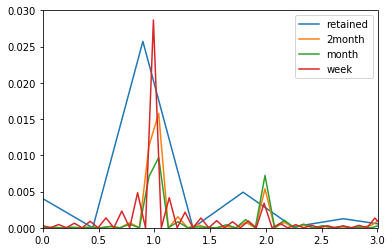

In [336]:
# 밤던전 참여 횟수

sns.kdeplot(df_ml.loc[df_ml.label=='retained','cnt_enter_bam'],label='retained').set_xlim(0,3)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','cnt_enter_bam'],label='2month').set_ylim(0,0.03)
sns.kdeplot(df_ml.loc[df_ml.label=='month','cnt_enter_bam'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','cnt_enter_bam'],label='week')

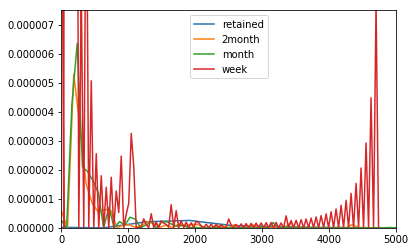

In [341]:
# 일반 채팅 횟수


sns.kdeplot(df_ml.loc[df_ml.label=='retained','normal_chat'],label='retained').set_xlim(0,5000)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','normal_chat'],label='2month').set_ylim(0,0.0000075)
sns.kdeplot(df_ml.loc[df_ml.label=='month','normal_chat'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','normal_chat'],label='week')

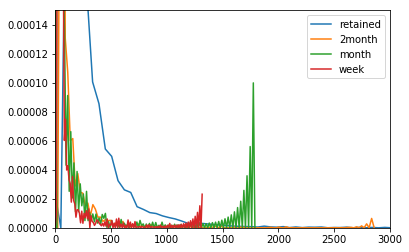

In [346]:
# 귓속말 채팅 횟수

sns.kdeplot(df_ml.loc[df_ml.label=='retained','whisper_chat'],label='retained').set_xlim(0,3000)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','whisper_chat'],label='2month').set_ylim(0,0.00015)
sns.kdeplot(df_ml.loc[df_ml.label=='month','whisper_chat'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','whisper_chat'],label='week')

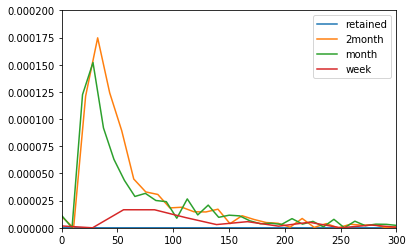

In [351]:
# 구역 채팅 횟수

sns.kdeplot(df_ml.loc[df_ml.label=='retained','district_chat'],label='retained').set_xlim(0,300)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','district_chat'],label='2month').set_ylim(0,0.0002)
sns.kdeplot(df_ml.loc[df_ml.label=='month','district_chat'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','district_chat'],label='week')

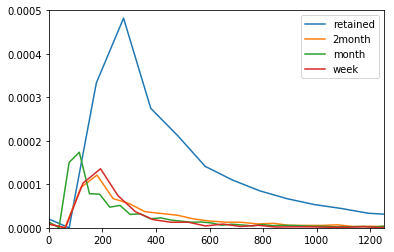

In [355]:
# 파티 채팅 횟수

sns.kdeplot(df_ml.loc[df_ml.label=='retained','party_chat'],label='retained').set_xlim(0,1250)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','party_chat'],label='2month').set_ylim(0,0.0005)
sns.kdeplot(df_ml.loc[df_ml.label=='month','party_chat'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','party_chat'],label='week')

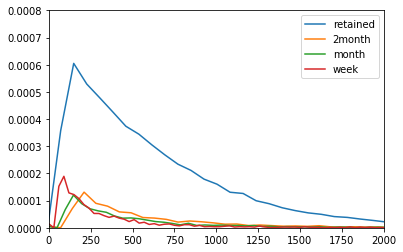

In [359]:
# 길드 채팅 횟수

sns.kdeplot(df_ml.loc[df_ml.label=='retained','guild_chat'],label='retained').set_xlim(0,2000)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','guild_chat'],label='2month').set_ylim(0,0.0008)
sns.kdeplot(df_ml.loc[df_ml.label=='month','guild_chat'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','guild_chat'],label='week')

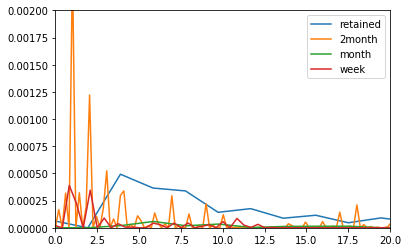

In [365]:
# 세력 채팅 횟수

sns.kdeplot(df_ml.loc[df_ml.label=='retained','faction_chat'],label='retained').set_xlim(0,20)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','faction_chat'],label='2month').set_ylim(0,0.002)
sns.kdeplot(df_ml.loc[df_ml.label=='month','faction_chat'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','faction_chat'],label='week')

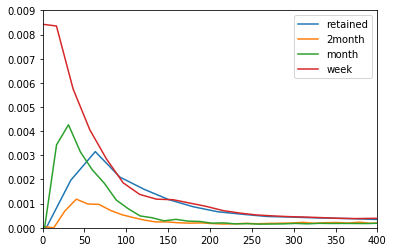

In [372]:
# 버프아이템 사용 횟수

sns.kdeplot(df_ml.loc[df_ml.label=='retained','cnt_use_buffitem'],label='retained').set_xlim(0,400)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','cnt_use_buffitem'],label='2month').set_ylim(0,0.009)
sns.kdeplot(df_ml.loc[df_ml.label=='month','cnt_use_buffitem'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','cnt_use_buffitem'],label='week')

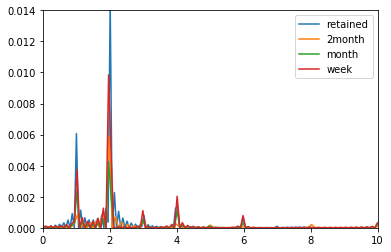

In [379]:
# 채집 횟수

sns.kdeplot(df_ml.loc[df_ml.label=='retained','gathering_cnt'],label='retained').set_xlim(0,10)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','gathering_cnt'],label='2month').set_ylim(0,0.014)
sns.kdeplot(df_ml.loc[df_ml.label=='month','gathering_cnt'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','gathering_cnt'],label='week')

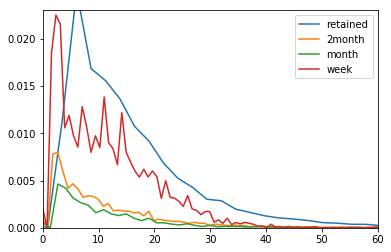

In [383]:
# 제작 횟수

sns.kdeplot(df_ml.loc[df_ml.label=='retained','making_cnt'],label='retained').set_xlim(0,60)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','making_cnt'],label='2month').set_ylim(0,0.023)
sns.kdeplot(df_ml.loc[df_ml.label=='month','making_cnt'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','making_cnt'],label='week')

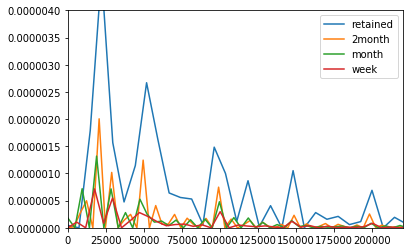

In [387]:
# 현금 지불액 

sns.kdeplot(df_ml.loc[df_ml.label=='retained','payment_amount'],label='retained').set_xlim(0,220000)
sns.kdeplot(df_ml.loc[df_ml.label=='2month','payment_amount'],label='2month').set_ylim(0,0.000004)
sns.kdeplot(df_ml.loc[df_ml.label=='month','payment_amount'],label='month')
sns.kdeplot(df_ml.loc[df_ml.label=='week','payment_amount'],label='week')